# 数据分析与可视化综合实验

# 试验目的

1. 熟悉Python标准库CSV的用法。
2. 熟悉CSV和TXT操作。
3. 熟悉安装扩展库numpy,pandas,matplotlib.
4. 熟悉使用扩展库pandas进行数据分析的基本操作。
5. 熟悉扩展库matplotlib进行数据可视化的基本操作。

In [11]:
import csv
import random
import datetime

In [12]:
fn ='data.csv'
with open (fn,'w') as fp:
    wr =csv.writer(fp,lineterminator='\n')
    wr.writerow(['日期','销量'])
    startDate=datetime.date(2017,1,1)
    for i in range(365):
        amount=300+i*5+random.randrange(100)
        wr.writerow([str(startDate),amount])
        startDate =startDate + datetime.timedelta(days=1)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('data.csv',encoding='cp936')
df=df.dropna()

<Figure size 432x288 with 0 Axes>

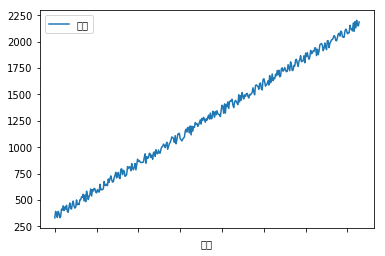

In [15]:
plt.figure()
df.plot(x = '日期')
plt.savefig('first.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

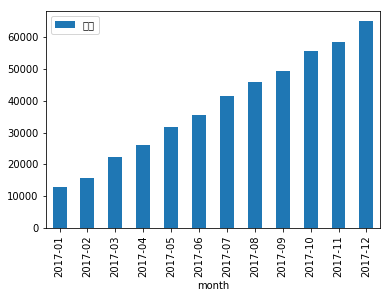

In [16]:
plt.figure()
df1=df[:]
df1['month']=df1['日期'].map(lambda x:x[:x.rindex('-')])
df1=df1.groupby(by='month',as_index=False).sum()
df1.plot(x = 'month',kind='bar')
plt.savefig('second.jpg')

In [17]:
df2=df1.drop('month',axis=1).diff()
m=df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt','w') as fp:
    fp.write(df1.loc[m,'month'])

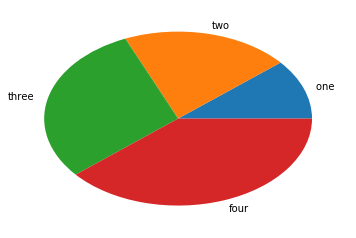

In [23]:
plt.figure()
one = df1[:3]['销量'].sum()
two = df1[3:6]['销量'].sum()
three = df1[6:9]['销量'].sum()
four  = df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
            labels = ['one ','two','three','four'])
plt.savefig('third.jpg')